In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings(action='ignore')
import numpy as np
import re

import matplotlib.pyplot as plt

import seaborn as sns


In [9]:
train = pd.read_csv('new_train.csv', encoding = 'utf-8')
test = pd.read_csv('new_test.csv', encoding = 'utf-8')
sample_submission = pd.read_csv('new_sample_submission.csv', encoding = 'utf-8')

train_old = pd.read_csv('train.csv', encoding = 'utf-8')
test_old = pd.read_csv('test_x.csv', encoding = 'utf-8')

In [22]:
train.groupby('author').count()

,index,text
author,,
0,13235,13235
1,7222,7222
2,11554,11554
3,15063,15063
4,7805,7805
5,7307,7307
6,8051,8051
7,12983,12983


In [18]:
#train 데이터 살펴보기
train
train.rename(columns={'Unnamed: 0':'index'}, inplace = True)
train

,index,text,author
0,0,It is hard to forget repulsive things. I remem...,6
1,1,It would be tedious if given in the beadle’s w...,7
2,2,“Very good. Shall we argue about it here in p...,2
3,3,“What! and I as high as a tree and as big as a...,6
4,4,"""Isn't it enough, Vanya?"" she cried, seeing hi...",3
...,...,...,...
83215,83215,"What with the birthday visitors, and what with...",7
83216,83216,It was an old rickety door and gave at once be...,2
83217,83217,"“Well then you can go to the devil,” said odin...",3
83218,83218,“Don’t know?”,7


In [4]:
#test 데이터 살펴보기
test = test[['index', 'text']]
test

,index,text
0,0,"About thirty years ago Miss Maria Ward, of Hun..."
1,1,"Their homes were so distant, and the circles i..."
2,2,The letter was not unproductive. It re-establi...
3,3,"Such were its immediate effects, and within a ..."
4,4,Sir Thomas could not give so instantaneous and...
...,...,...
27313,27313,"At the end of another day or two, odin growing..."
27314,27314,"All afternoon we sat together, mostly in silen..."
27315,27315,"odin, having carried his thanks to odin, proc..."
27316,27316,"Soon after this, upon odin's leaving the room,..."


In [5]:
#부호를 제거해주는 함수
def alpha_num(text):
    return re.sub(r'[^A-Za-z0-9 ]', '', text)

train['text']=train['text'].apply(alpha_num)

In [6]:
# 불용어 제거해주는 함수
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in base_stopwords:
            final_text.append(i.strip())
    return " ".join(final_text)

# 불용어
base_stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", 
             "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", 
             "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", 
             "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", 
             "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", 
             "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", 
             "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", 
             "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", 
             "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", 
             "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", 
             "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [7]:
train['text'] = train['text'].str.lower()
test['text'] = test['text'].str.lower()
train['text'] = train['text'].apply(alpha_num).apply(remove_stopwords)
test['text'] = test['text'].apply(alpha_num).apply(remove_stopwords)

In [8]:
X_train = np.array([x for x in train['text']])
X_test = np.array([x for x in test['text']])
y_train = np.array([x for x in train['author']])

#### 작가별로 문장의 수 비교

In [23]:
# 작가별 text 나누는 함수 정의
author_0 = train.loc[train['author'] == 0, 'text']
author_1 = train.loc[train['author'] == 1, 'text']
author_2 = train.loc[train['author'] == 2, 'text']
author_3 = train.loc[train['author'] == 3, 'text']
author_4 = train.loc[train['author'] == 4, 'text']
author_5 = train.loc[train['author'] == 5, 'text']
author_6 = train.loc[train['author'] == 6, 'text']
author_7 = train.loc[train['author'] == 7, 'text']

# print(author_0.shape)
# print(author_1.shape)
# print(author_2.shape)
# print(author_3.shape)
# print(author_4.shape)
# print(author_5.shape)
# print(author_6.shape)
# print(author_7.shape)


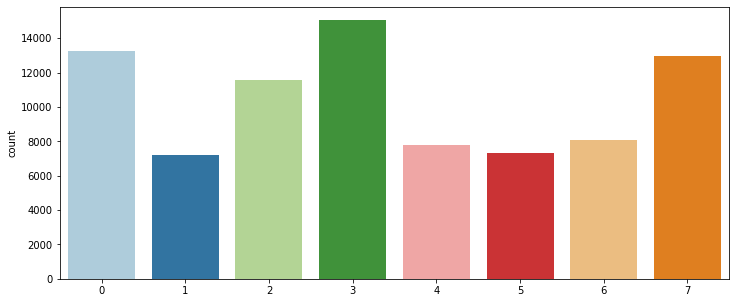

In [24]:
# 작가별 text길이 시각화
sns.set_palette("Paired")
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train,)
plt.show()

In [25]:
# keras 문장 토큰화
## text_to_word_sequence는 알파벳을 소문자로 바꾸고, Punctuation을 제거한다
from tensorflow.keras.preprocessing.text import text_to_word_sequence


# 시리즈를 리스트로, 리스트를 문자열로 바꾸는 함수 (text_to_word_sequence가 문자열만 입력값으로 받기 때문)
def series_list_to_str(a):
    a.to_list()
    return " ".join([str(_) for _ in a])


str_author_0 = series_list_to_str(author_0)
str_author_1 = series_list_to_str(author_1)
str_author_2 = series_list_to_str(author_2)
str_author_3 = series_list_to_str(author_3)
str_author_4 = series_list_to_str(author_4)
str_author_5 = series_list_to_str(author_5)
str_author_6 = series_list_to_str(author_6)
str_author_7 = series_list_to_str(author_7)


In [26]:
# 문장을 단어로 바꿔주는 함수
author_word_0 = text_to_word_sequence(str_author_0)
author_word_1 = text_to_word_sequence(str_author_1)
author_word_2 = text_to_word_sequence(str_author_2)
author_word_3 = text_to_word_sequence(str_author_3)
author_word_4 = text_to_word_sequence(str_author_4)
author_word_5 = text_to_word_sequence(str_author_5)
author_word_6 = text_to_word_sequence(str_author_6)
author_word_7 = text_to_word_sequence(str_author_7)
# print(author_word_0[:20])

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [28]:
tokenizer = Tokenizer()

# fit_on_texts 적용 함수
# fit_on_texts()는 입력한 텍스트로부터 단어 빈도수가 높은 순으로 낮은 정수 인덱스를 부여


def fitontexts(words):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts([words])
    return tokenizer.word_index


# 이 과정으로 작가별 빈도수가 높은 단어를 구할 수 있음.
author0_index = fitontexts(author_word_0)
author1_index = fitontexts(author_word_1)
author2_index = fitontexts(author_word_2)
author3_index = fitontexts(author_word_3)
author4_index = fitontexts(author_word_4)
author5_index = fitontexts(author_word_5)
author6_index = fitontexts(author_word_6)
author7_index = fitontexts(author_word_7)



# print(author0_index)
# print(author1_index)
# print(author2_index)
# print(author3_index)
# print(author4_index)
# print(author5_index)
# print(author6_index)
# print(author7_index)

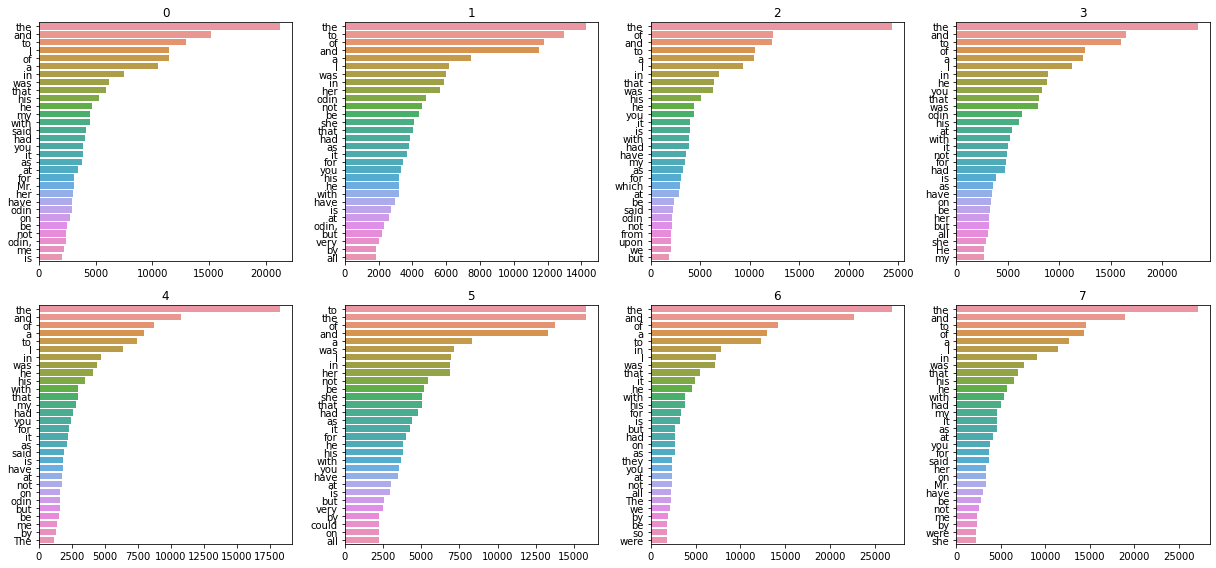

In [37]:
# 상위 30개 많이 쓰인 단어
import seaborn as sns
from collections import Counter


def plot_top_non_stopwords_barchart(text):

    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:30]:
        x.append(word)
        y.append(count)
    return x, y

#     sns.barplot(x=y, y=x)

fig = plt.figure(figsize=(17, 8))  # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 4


for i in range(8):
    x, y = plot_top_non_stopwords_barchart(
        train[train['author'] == i]['text'])
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(i)
    sns.barplot(x=y, y=x)
    plt.tight_layout()

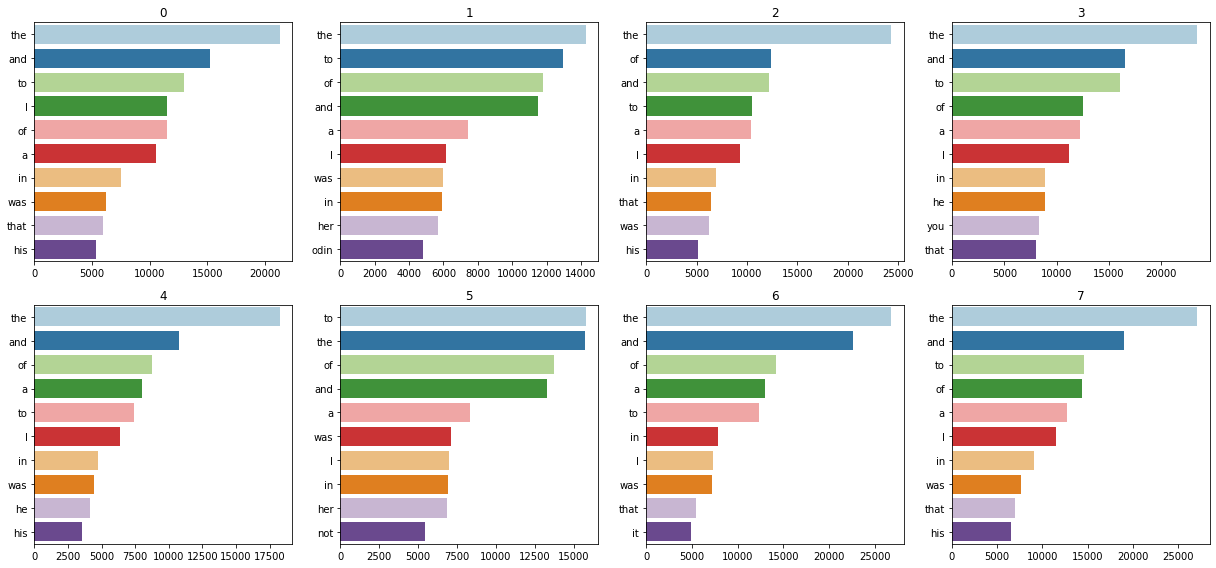

In [34]:
# 작가별 많이 쓴 단어 상위 10개
fig = plt.figure(figsize=(17, 8))  # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 4


def plot_top_non_stopwords_barchart2(text):

    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:10]:
        x.append(word)
        y.append(count)
    return x, y


for i in range(8):
    x, y = plot_top_non_stopwords_barchart2(
        train[train['author'] == i]['text'])
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(i)
    sns.barplot(x=y, y=x)
    plt.tight_layout()

#### n-gram

In [ ]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(base_stopwords)

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

plot_top_ngrams_barchart(train['text'], n=3)    

In [ ]:
fig = plt.figure(figsize=(16,10)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 4

def plot_top_ngrams_barchart2(text, n=2):
    stop=set(base_stopwords)

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    
    return x, y

for i in range(8):
    x,y = plot_top_ngrams_barchart2(train[train['author']==i]['text'], n=3)
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(i)
    sns.barplot(x=y,y=x)

#### Topic Modeling exploration with pyLDAvis

In [ ]:
# With NLTK you can tokenize and lemmatize easily:

import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim

NUM_TOPICS = 8


def get_lda_objects(text):
    nltk.download('stopwords')
    stop = set(base_stopwords)

    def _preprocess_text(text):
        corpus = []
        stem = PorterStemmer()
        lem = WordNetLemmatizer()
        for news in text:
            words = [w for w in word_tokenize(news) if (w not in stop)]

            words = [lem.lemmatize(w) for w in words if len(w) > 2]

            corpus.append(words)
        return corpus

    corpus = _preprocess_text(text)

    dic = gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]

    lda_model = gensim.models.LdaMulticore(bow_corpus,
                                           num_topics=NUM_TOPICS,
                                           id2word=dic,
                                           passes=10,
                                           workers=2)

    return lda_model, bow_corpus, dic


def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
    return vis

In [ ]:
lda_model, bow_corpus, dic = get_lda_objects(train['text'])

In [ ]:
lda_model.show_topics()

In [ ]:
plot_lda_vis(lda_model, bow_corpus, dic)

##### test data LDA

In [ ]:
lda_model, bow_corpus, dic = get_lda_objects(test['text'])

In [ ]:
plot_lda_vis(lda_model, bow_corpus, dic)

#### Sentiment analysis (감정분석?)

In [ ]:
from textblob import TextBlob
    
def plot_polarity_histogram(text):
    
    def _polarity(text):
        return TextBlob(text).sentiment.polarity
        
    polarity_score = text.apply(lambda x : _polarity(x))
    return polarity_score

In [ ]:

fig = plt.figure(figsize=(10,5)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 4

for i in range(8):
    polarity_score = plot_polarity_histogram(train[train['author']==i]['text'])
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(i)
    polarity_score.hist()

##### test data polarity

In [ ]:
polarity_score = plot_polarity_histogram(test['text'])
polarity_score.hist()

In [ ]:
def sentiment_vader(text, sid):
    ss = sid.polarity_scores(text)
    ss.pop('compound')
    return max(ss, key=ss.get)

def sentiment_textblob(text):
        x = TextBlob(text).sentiment.polarity
        
        if x<0:
            return 'neg'
        elif x==0:
            return 'neu'
        else:
            return 'pos'

def plot_sentiment_barchart(text, method='TextBlob'):
    if method == 'TextBlob':
        sentiment = text.map(lambda x: sentiment_textblob(x))
    elif method == 'Vader':
        nltk.download('vader_lexicon')
        sid = SentimentIntensityAnalyzer()
        sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    else:
        raise ValueError('Textblob or Vader')
    
    return sentiment

In [ ]:
fig = plt.figure(figsize=(10,5)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 4

for i in range(8):
    sentiment = plot_sentiment_barchart(train[train['author']==i]['text'])
    ax = fig.add_subplot(rows, cols, i+1)
    #plt.bar(sentiment.value_counts().index, sentiment.value_counts())
    ax.set_title(i)
    sns.barplot(sentiment.value_counts().index, sentiment.value_counts())

##### test data sentiment

In [ ]:
sentiment = plot_sentiment_barchart(test['text'])
sns.barplot(sentiment.value_counts().index, sentiment.value_counts())

#### Named Entity Recognition (개체명인식 NER)

In [ ]:
import spacy
from collections import  Counter
import seaborn as sns

def plot_named_entity_barchart(text):
    nlp = spacy.load("en_core_web_sm")
    
    def _get_ner(text):
        doc=nlp(text)
        return [X.label_ for X in doc.ents]
    
    ent=text.apply(lambda x : _get_ner(x))
    ent=[x for sub in ent for x in sub]
    counter=Counter(ent)
    count=counter.most_common()
    
    x,y=map(list,zip(*count))
    return x,y

In [ ]:
fig = plt.figure(figsize=(20,20)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 4

for i in range(8):
    x, y = plot_named_entity_barchart(train[train['author']==i]['text'])
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(i)
    sns.barplot(x=y,y=x)

#### 사람이름 분포

In [ ]:
import spacy
from collections import Counter
import seaborn as sns


def plot_most_common_named_entity_barchart(text, entity="PERSON"):
    nlp = spacy.load("en_core_web_sm")

    def _get_ner(text, ent):
        doc = nlp(text)
        return [X.text for X in doc.ents if X.label_ == ent]

    entity_filtered = text.apply(lambda x: _get_ner(x, entity))
    entity_filtered = [i for x in entity_filtered for i in x]

    counter = Counter(entity_filtered)
    x, y = map(list, zip(*counter.most_common(10)))
    return x, y

In [ ]:
fig = plt.figure(figsize=(20, 15))  # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 4

for i in range(8):
    x, y = plot_most_common_named_entity_barchart(
        train[train['author'] == i]['text'], entity="PERSON")
    ax = fig.add_subplot(rows, cols, i + 1)
    sns.barplot(y, x).set_title(i)